# Weather Prediction with Ridge Regression

This project uses NOAA weather reporting data for Houston, Texas to predict the next day's max temperature. 

Tutorial by Dataquest: [https://www.youtube.com/watch?v=km95-NMT6lU]()

Data Source: [https://www.ncdc.noaa.gov/cdo-web/search]()

In [2]:
import pandas as pd

## Reading The Data Into Pandas

In [4]:
weather_df = pd.read_csv("houston_weather_1970_to_2025.csv", index_col = "DATE")
weather_df

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,PSUN,SNOW,...,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT21,WV03
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",0.0,0.0,NaN,NaN,1648.0,0.00,99.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",70.0,100.0,NaN,NaN,1342.0,0.19,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1970-01-03,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",50.0,40.0,NaN,NaN,1012.0,0.00,85.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",70.0,100.0,NaN,NaN,1406.0,0.07,16.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1970-01-05,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",100.0,100.0,NaN,NaN,2318.0,0.78,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-14,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",NaN,NaN,7.83,NaN,NaN,0.00,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-15,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",NaN,NaN,5.59,NaN,NaN,0.00,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-16,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",NaN,NaN,9.17,NaN,NaN,0.00,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#syntax if you want to get slices on the dataset
weather_df.loc['1970-01-01':'1970-02-01']

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,PSUN,SNOW,...,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT21,WV03
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",0.0,0.0,NaN,NaN,1648.0,0.00,99.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",70.0,100.0,NaN,NaN,1342.0,0.19,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1970-01-03,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",50.0,40.0,NaN,NaN,1012.0,0.00,85.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",70.0,100.0,NaN,NaN,1406.0,0.07,16.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1970-01-05,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",100.0,100.0,NaN,NaN,2318.0,0.78,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1970-01-06,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",40.0,20.0,NaN,NaN,1212.0,0.00,83.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1970-01-07,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",0.0,0.0,NaN,NaN,1554.0,0.00,100.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-08,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",60.0,70.0,NaN,NaN,1406.0,0.00,56.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-09,USW00012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",100.0,100.0,NaN,NaN,536.0,0.03,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preparing the Data for Machine Learning

In [7]:
weather_df.shape
#shape[0] prints num rows - 20197
#shape[1] prints num cols - 43

(20197, 43)

In [8]:
#fix any missing values 

'''
show the percentage of each column that is null by dividing the sum of 
null values in each column by the number of total rows 
'''
weather_df.apply(pd.isnull).sum()/weather_df.shape[0] 

STATION    0.000000
NAME       0.000000
ACMH       0.522305
ACSH       0.522305
AWND       0.253701
FMTM       0.495618
PGTM       0.284250
PRCP       0.000050
PSUN       0.746844
SNOW       0.000099
SNWD       0.000149
TAVG       0.649601
TMAX       0.000050
TMIN       0.000050
TSUN       0.449324
WDF1       0.522355
WDF2       0.478041
WDF5       0.480220
WDFG       0.525524
WESD       0.710650
WSF1       0.522355
WSF2       0.478041
WSF5       0.480121
WSFG       0.525375
WT01       0.524187
WT02       0.934198
WT03       0.828044
WT04       0.997920
WT05       0.984701
WT06       0.997376
WT07       0.996485
WT08       0.776155
WT09       0.998713
WT10       0.999950
WT11       0.999010
WT13       0.871565
WT14       0.971382
WT15       0.999208
WT16       0.684706
WT17       0.999109
WT18       0.998416
WT21       0.991038
WV03       0.999703
dtype: float64

In [9]:
'''
data documentation: core values are our focus; we are assuming these are the most accurate
have the fewest nulls, and are the most important features to us
'''

#copy core values to new df
core_weather_df = weather_df[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy() 

In [10]:
core_weather_df.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]
core_weather_df

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1970-01-01,0.00,0.0,0.0,56.0,25.0
1970-01-02,0.19,0.0,0.0,45.0,32.0
1970-01-03,0.00,0.0,0.0,51.0,29.0
1970-01-04,0.07,0.0,0.0,53.0,26.0
1970-01-05,0.78,0.0,0.0,50.0,40.0
...,...,...,...,...,...
2025-04-14,0.00,0.0,0.0,87.0,70.0
2025-04-15,0.00,0.0,0.0,83.0,62.0
2025-04-16,0.00,0.0,0.0,83.0,62.0


## Fill In Missing Values

In [12]:
core_weather_df.apply(pd.isnull).sum()/core_weather_df.shape[0] 

precip        0.000050
snow          0.000099
snow_depth    0.000149
temp_max      0.000050
temp_min      0.000050
dtype: float64

In [13]:
'''
Forward filling in data imputation fills in the previous known value into a null value. ffill and bfill are good for time series data,
particularly when there is a relatively stable trend over time. In the case of weather, a the weather from a particular day is more than likely
similar to the previous day, making ffill a good choice. 
'''
core_weather_df = core_weather_df.ffill()

In [14]:
core_weather_df.apply(pd.isnull).sum()/core_weather_df.shape[0] 

precip        0.0
snow          0.0
snow_depth    0.0
temp_max      0.0
temp_min      0.0
dtype: float64

In [15]:
core_weather_df.apply(pd.isnull).sum()

precip        0
snow          0
snow_depth    0
temp_max      0
temp_min      0
dtype: int64

In [16]:
core_weather_df.shape

(20197, 5)

## Verifying the Data Types

In [18]:
core_weather_df.dtypes

precip        float64
snow          float64
snow_depth    float64
temp_max      float64
temp_min      float64
dtype: object

In [19]:
core_weather_df.index
# currently the dates in the index are being treated as strings

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2025-04-09', '2025-04-10', '2025-04-11', '2025-04-12', '2025-04-13',
       '2025-04-14', '2025-04-15', '2025-04-16', '2025-04-17', '2025-04-18'],
      dtype='object', name='DATE', length=20197)

In [20]:
core_weather_df.index = pd.to_datetime(core_weather_df.index)
core_weather_df.index

# fixed! The pandas to_datetime function converts other data types to datetime if
# formatted right

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2025-04-09', '2025-04-10', '2025-04-11', '2025-04-12',
               '2025-04-13', '2025-04-14', '2025-04-15', '2025-04-16',
               '2025-04-17', '2025-04-18'],
              dtype='datetime64[ns]', name='DATE', length=20197, freq=None)

In [21]:
#with datetime you can subset the satetime index - can be good for seeing trends/data aggregation
core_weather_df.index.year

Index([1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970,
       ...
       2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025],
      dtype='int32', name='DATE', length=20197)

In the data documentation, there is a note saying 9999 in a field indicates missing data or data that wasn't received. 

.apply goes column by column, and in this case, with lambda and sum, checks if there is 9999 for any of the fields.  

In [23]:
core_weather_df.apply(lambda x: (x == 9999).sum())

precip        0
snow          0
snow_depth    0
temp_max      0
temp_min      0
dtype: int64

Thankfully Houston is great at weather data collection

## Analyzing Our Weather Data

<Axes: xlabel='DATE'>

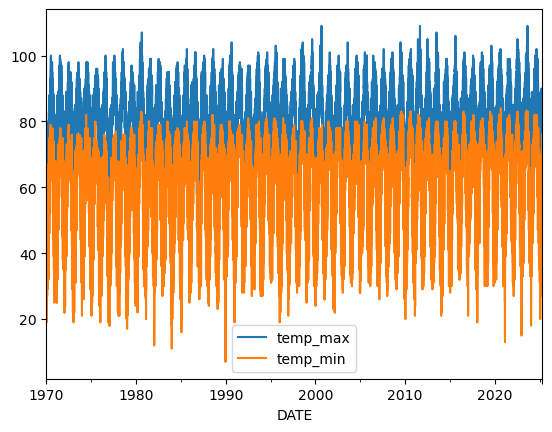

In [26]:
core_weather_df[["temp_max", "temp_min"]].plot()

Another win for Houston. No crazy gaps or abnormal patterns. 

Since this is historical data and low stakes, it wouldn't matter much _in this case_. We could find data from another station and join it, but we're good here. 

<Axes: xlabel='DATE'>

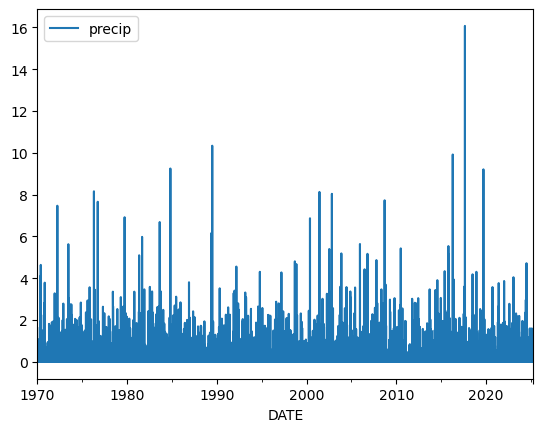

In [28]:
core_weather_df[["precip"]].plot()

No outliers - 16" of rain from Harvey

In [30]:
#Check for avg precip, snow, and depth

core_weather_df.groupby(core_weather_df.index.year).sum()[["precip","snow","snow_depth"]]

,precip,snow,snow_depth
DATE,,,
1970,48.19,0.0,0.0
1971,37.83,0.0,0.0
1972,50.80,0.0,0.0
1973,70.16,4.8,2.0
1974,49.29,0.0,0.0
1975,50.97,0.0,0.0
1976,54.62,0.0,0.0
1977,34.94,0.0,0.0
1978,44.93,0.4,0.0


In [31]:
core_weather_df.groupby(core_weather_df.index.year).mean()[["temp_max", "temp_min"]]

,temp_max,temp_min
DATE,,
1970,77.473973,56.723288
1971,79.797260,58.219178
1972,79.062842,57.341530
1973,78.457534,57.019178
1974,79.391781,58.457534
1975,79.347945,56.915068
1976,77.174863,54.327869
1977,78.980822,56.084932
1978,77.838356,55.649315


2025 has weird numbers becuase we're only halfway through

## Training Our First ML Model

Predicting tomorrow's max temp with the historical data

In [34]:
'''
Shift -1 pulls every row back one position

Here, we are creating a new column, "target" that shows the max temp shifted -1, which
pulls the next day's max temp and shows it in the current row. 
'''
core_weather_df["target"] = core_weather_df.shift(-1)["temp_max"]
core_weather_df

,precip,snow,snow_depth,temp_max,temp_min,target
DATE,,,,,,
1970-01-01,0.00,0.0,0.0,56.0,25.0,45.0
1970-01-02,0.19,0.0,0.0,45.0,32.0,51.0
1970-01-03,0.00,0.0,0.0,51.0,29.0,53.0
1970-01-04,0.07,0.0,0.0,53.0,26.0,50.0
1970-01-05,0.78,0.0,0.0,50.0,40.0,40.0
...,...,...,...,...,...,...
2025-04-14,0.00,0.0,0.0,87.0,70.0,83.0
2025-04-15,0.00,0.0,0.0,83.0,62.0,83.0
2025-04-16,0.00,0.0,0.0,83.0,62.0,87.0


In [35]:
# Saved core weather df as a copy of the OG dataset without the last row
# iloc[:-1, :] - :-1 means from start up to (not incl) the last row, : all columns
core_weather_df = core_weather_df.iloc[:-1, :].copy()
core_weather_df

,precip,snow,snow_depth,temp_max,temp_min,target
DATE,,,,,,
1970-01-01,0.00,0.0,0.0,56.0,25.0,45.0
1970-01-02,0.19,0.0,0.0,45.0,32.0,51.0
1970-01-03,0.00,0.0,0.0,51.0,29.0,53.0
1970-01-04,0.07,0.0,0.0,53.0,26.0,50.0
1970-01-05,0.78,0.0,0.0,50.0,40.0,40.0
...,...,...,...,...,...,...
2025-04-13,0.00,0.0,0.0,88.0,67.0,87.0
2025-04-14,0.00,0.0,0.0,87.0,70.0,83.0
2025-04-15,0.00,0.0,0.0,83.0,62.0,83.0


### Ridge Regression
[Ridge regression](https://www.geeksforgeeks.org/what-is-ridge-regression/), aka L2 Regularization, is a technique used in linear regression to 
address multicollinearity and thus, overfitting. It makes a model better at generalizing to new data. 

The penalty term that Ridge regression adds disallows coefficients from being too large, something that is indicative of overfitting.


In [37]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha = .1)

In [38]:
predictors = ["precip","temp_max", "temp_min"]

#Come back and see accuracy with/without snow
# with: ".5023; w/o .5013 
# curious to see whether it improves accuracy in winter months

In [39]:
'''
With time series data, we want to make sure we are training with past data and testing 
with future data. We want our algorithm to mirror how the data will be used in the 
real world.
'''
train = core_weather_df.loc[:"2022-12-31"]

In [40]:
test = core_weather_df.loc["2023-01-01":]

In [41]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [42]:
predictions = reg.predict(test[predictors])

In [43]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(test["target"], predictions) # Get MAE by comparing actual target
#values in test with the predicted values [predictions]


4.501324661563771

Our temp prediction is off from the actual temp by 4.5 degrees on average

## Evaluating Our Model

[NumPy Array vs Pandas Series](https://www.geeksforgeeks.org/numpy-array-vs-pandas-series/)

Here, we want to concatenate the target and predicted values to see them side by side.

Currently, predictions are a numpy array - we need to convert this to a series and match the series index with the dataset's index to be able to concatenate the two temps

In [47]:
combined_temps = pd.concat([test["target"], pd.Series(predictions, index = test.index)], 
                            axis = 1)
combined_temps.columns = ["actual", "prediction"]
combined_temps

,actual,prediction
DATE,,
2023-01-01,76.0,79.306293
2023-01-02,78.0,78.775532
2023-01-03,72.0,78.280054
2023-01-04,72.0,72.420536
2023-01-05,79.0,71.654352
...,...,...
2025-04-13,87.0,87.218096
2025-04-14,83.0,86.934928
2025-04-15,83.0,82.737518


<Axes: xlabel='DATE'>

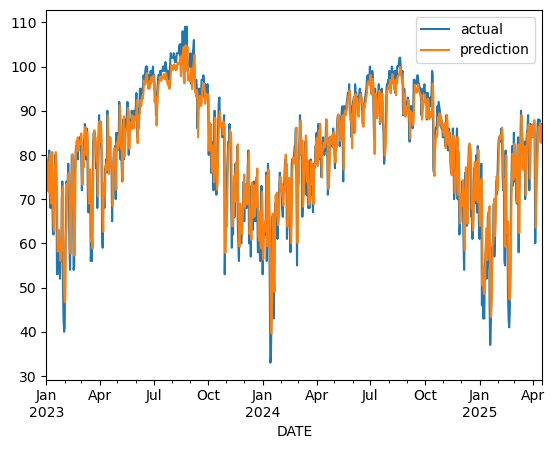

In [48]:
combined_temps.plot()

In [49]:
# Shows the weight of each parameter in this model
# In this case, precip, max temp, and min temp respectively
reg.coef_

array([-1.08435768,  0.74287874,  0.15323684])

In [50]:
from sklearn.metrics import mean_absolute_error

In [51]:
# Create a function so you don't have to run each cell individually every time
def create_predictions(predictors, core_weather_df, reg):
    train = core_weather_df.loc[:"2022-12-31"]
    test = core_weather_df.loc["2023-01-01":]
    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test["target"], predictions)
    combined_temps = pd.concat([test["target"], pd.Series(predictions, index = test.index)], 
                            axis = 1)
    combined_temps.columns = ["actual", "prediction"]
    return error, combined_temps

## Adding in Rolling Means

In [53]:
core_weather_df["month_max"] = core_weather_df["temp_max"].rolling(30).mean()
core_weather_df

,precip,snow,snow_depth,temp_max,temp_min,target,month_max
DATE,,,,,,,
1970-01-01,0.00,0.0,0.0,56.0,25.0,45.0,NaN
1970-01-02,0.19,0.0,0.0,45.0,32.0,51.0,NaN
1970-01-03,0.00,0.0,0.0,51.0,29.0,53.0,NaN
1970-01-04,0.07,0.0,0.0,53.0,26.0,50.0,NaN
1970-01-05,0.78,0.0,0.0,50.0,40.0,40.0,NaN
...,...,...,...,...,...,...,...
2025-04-13,0.00,0.0,0.0,88.0,67.0,87.0,81.533333
2025-04-14,0.00,0.0,0.0,87.0,70.0,83.0,81.666667
2025-04-15,0.00,0.0,0.0,83.0,62.0,83.0,81.866667


In [54]:
#see how diff a day's temp is from monthly mean
core_weather_df["month_day_max"] = core_weather_df["month_max"] / core_weather_df["temp_max"]

In [55]:
# ratio between max and min temps
core_weather_df["max_min"] = core_weather_df["temp_max"] / core_weather_df["temp_min"]

In [56]:
predictors = ["precip","temp_max", "temp_min", "month_max", "month_day_max", "max_min"]

In [57]:
core_weather_df = core_weather_df.iloc[30:, :].copy()

In [58]:
error, combined_temps = create_predictions(predictors, core_weather_df, reg)

In [59]:
# that helped a bit..
error

4.370745026341828

<Axes: xlabel='DATE'>

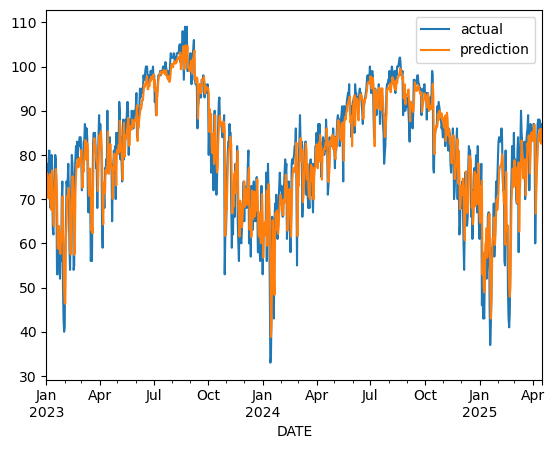

In [60]:
combined_temps.plot()

In [61]:
'''
Use .transform instead of .apply here to make sure the monthly average output is a  
'''
core_weather_df["monthly_avg"] = core_weather_df["temp_max"].groupby(core_weather_df.index.month).transform(lambda x: x.expanding(1).mean())

In [62]:
core_weather_df

,precip,snow,snow_depth,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg
DATE,,,,,,,,,,
1970-01-31,0.05,0.0,0.0,54.0,31.0,64.0,55.733333,1.032099,1.741935,54.000000
1970-02-01,1.08,0.0,0.0,64.0,50.0,56.0,56.366667,0.880729,1.280000,64.000000
1970-02-02,0.00,0.0,0.0,56.0,34.0,50.0,56.533333,1.009524,1.647059,60.000000
1970-02-03,0.00,0.0,0.0,50.0,27.0,64.0,56.433333,1.128667,1.851852,56.666667
1970-02-04,0.00,0.0,0.0,64.0,30.0,65.0,56.900000,0.889062,2.133333,58.500000
...,...,...,...,...,...,...,...,...,...,...
2025-04-13,0.00,0.0,0.0,88.0,67.0,87.0,81.533333,0.926515,1.313433,79.531569
2025-04-14,0.00,0.0,0.0,87.0,70.0,83.0,81.666667,0.938697,1.242857,79.536058
2025-04-15,0.00,0.0,0.0,83.0,62.0,83.0,81.866667,0.986345,1.338710,79.538138


In [63]:
'''
day_of_year looks at what day of the year (i.e. day 1, day 90, etc.) it is across multiple years
Here we want to look at the average temp of a given day of year for all years prior to the current record. e.g. the day of year average for day
1 of year 2000 is the average of all day 1 temps from 1970-1999
'''
core_weather_df["day_of_year_avg"] = core_weather_df["temp_max"].groupby(core_weather_df.index.day_of_year).transform(lambda x: x.expanding(1).mean())

In [64]:
core_weather_df

,precip,snow,snow_depth,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg
DATE,,,,,,,,,,,
1970-01-31,0.05,0.0,0.0,54.0,31.0,64.0,55.733333,1.032099,1.741935,54.000000,54.000000
1970-02-01,1.08,0.0,0.0,64.0,50.0,56.0,56.366667,0.880729,1.280000,64.000000,64.000000
1970-02-02,0.00,0.0,0.0,56.0,34.0,50.0,56.533333,1.009524,1.647059,60.000000,56.000000
1970-02-03,0.00,0.0,0.0,50.0,27.0,64.0,56.433333,1.128667,1.851852,56.666667,50.000000
1970-02-04,0.00,0.0,0.0,64.0,30.0,65.0,56.900000,0.889062,2.133333,58.500000,64.000000
...,...,...,...,...,...,...,...,...,...,...,...
2025-04-13,0.00,0.0,0.0,88.0,67.0,87.0,81.533333,0.926515,1.313433,79.531569,80.125000
2025-04-14,0.00,0.0,0.0,87.0,70.0,83.0,81.666667,0.938697,1.242857,79.536058,78.446429
2025-04-15,0.00,0.0,0.0,83.0,62.0,83.0,81.866667,0.986345,1.338710,79.538138,78.892857


In [65]:
# did not help :(
predictors = ["precip","temp_max", "temp_min", "month_max", "month_day_max", "max_min", "monthly_avg", "day_of_year_avg"]
error

4.370745026341828

In [66]:
reg.coef_

array([ -1.45232022,   0.27187086,   0.32132649,   0.42919251,
       -10.87975662,   7.79484655])

In [67]:
core_weather_df.corr()["target"]

precip            -0.068258
snow              -0.065179
snow_depth        -0.029443
temp_max           0.886405
temp_min           0.808385
target             1.000000
month_max          0.804870
month_day_max     -0.418978
max_min           -0.356445
monthly_avg        0.816582
day_of_year_avg    0.831871
Name: target, dtype: float64

In [68]:
combined_temps["diff"] = (combined_temps["actual"] - combined_temps["prediction"]).abs()

In [69]:
combined_temps.sort_values("diff", ascending=False).head(20)

,actual,prediction,diff
DATE,,,
2023-10-29,53.0,85.367860,32.367860
2025-01-05,46.0,74.169215,28.169215
2024-01-14,33.0,55.770917,22.770917
2025-04-05,60.0,81.549981,21.549981
2025-02-14,81.0,59.647447,21.352553
2025-01-18,46.0,66.713392,20.713392
2025-03-08,58.0,78.319862,20.319862
2023-01-29,51.0,70.646365,19.646365
2024-02-28,55.0,73.596979,18.596979


## Future

- Test different models and try ensemble models specifically to try and improve model accuracy
- Redo project one year later. See if budget cuts to NOAA and NWS affected reporting capabilities and/or decreased model accuracy